In [ ]:
    PLAYER PERFORMANCE ANALYSIS

This notebook analyzes the impact of the COVID-19 pandemic globally. And answer the following questions
 1. Which players have the highest market value and why? 
 2. Is there a correlation between age and player performance?
 3. Which nationalities dominate in FIFA rankings?
 4. What attributes (speed, shooting, passing) contribute most to player value

In [3]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline



In [15]:
players = pd.read_csv("Desktop/Data Analysis class/Python-class/male_players (legacy).csv", low_memory = False)

In [4]:
players.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [4]:
# Top 10 most valuable players
top_value_players = players[['short_name', 'age', 'nationality_name', 'overall', 'value_eur', 'club_name', 
                        'dribbling', 'shooting', 'pace']].sort_values(by='value_eur', ascending=False).head(10)

print(top_value_players)



          short_name  age nationality_name  overall    value_eur  \
123817     K. Mbappé   22           France       91  194000000.0   
143054     K. Mbappé   23           France       91  190500000.0   
104935     K. Mbappé   21           France       90  185500000.0   
143078    E. Haaland   21           Norway       88  148000000.0   
123840    E. Haaland   20           Norway       88  137500000.0   
104927     Neymar Jr   28           Brazil       91  132000000.0   
123820       H. Kane   27          England       90  129500000.0   
104928  K. De Bruyne   29          Belgium       91  129000000.0   
123814     Neymar Jr   29           Brazil       91  129000000.0   
123815  K. De Bruyne   30          Belgium       91  125500000.0   

                  club_name  dribbling  shooting  pace  
123817  Paris Saint-Germain       92.0      88.0  97.0  
143054  Paris Saint Germain       92.0      89.0  97.0  
104935  Paris Saint-Germain       91.0      86.0  96.0  
143078      Manchester 

K. Mbappe, E.Haaland and Neymar jr have highest market value

In [8]:
top_players = players[players['overall'] >= 90]['short_name'].value_counts().head(10)
print(top_players)

short_name
L. Messi             9
Cristiano Ronaldo    9
M. Neuer             7
R. Lewandowski       6
K. De Bruyne         5
L. Suárez            4
J. Oblak             4
K. Mbappé            3
M. Salah             3
Neymar               3
Name: count, dtype: int64


L.Messi and C.Ronaldo are the best top players

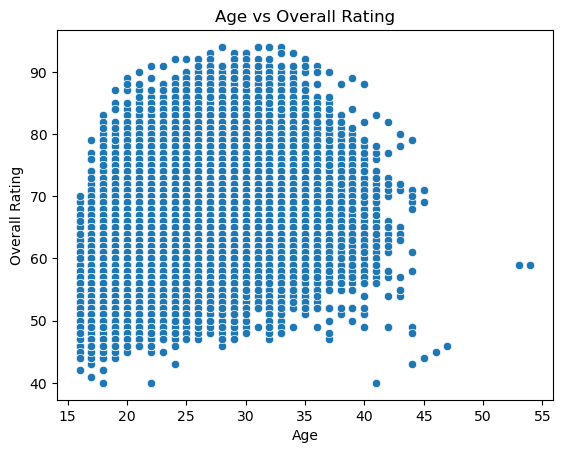

In [16]:
# Correlation between Age and Overall
sns.scatterplot(data=players, x='age', y='overall')
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()



There is nonlinear correlation between age and performance, meaning player can have peak performance at any age given,
but most best performance is between ages 20 and 31

In [15]:
# Pearson correlation
corr = players['age'].corr(players['overall'])
print(f"Correlation between Age and Overall: {corr:.2f}")


Correlation between Age and Overall: 0.46


peason correlation shows positive correlation of +0.46 between age and performance
it implies that increase  in age can cause increase in performance

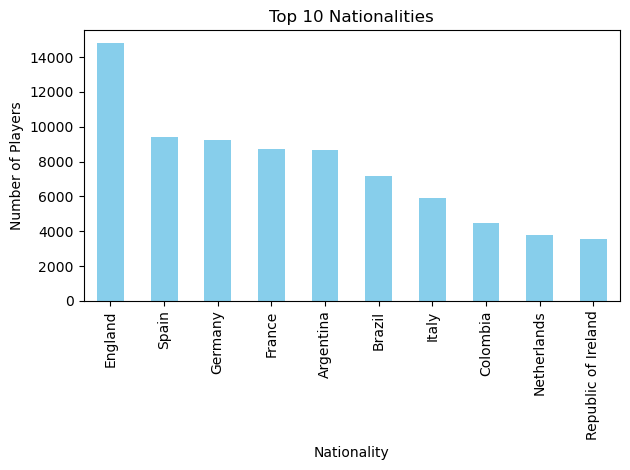

In [5]:
# Top 10 nationalities by number of players rated  90
top_countries = players['nationality_name'].value_counts().head(10)

# Plot
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

England, Spain and Germany are the nationalities that dominates FIFA Ranking

In [4]:
#replace the missing value with mean
players['pace'] = players['pace'].fillna(players['pace'].mean())
players['shooting'] = players['shooting'].fillna(players['shooting'].mean())
players['dribbling'] = players['dribbling'].fillna(players['dribbling'].mean())
players['value_eur'] = players['value_eur'].fillna(players['value_eur'].mean())

In [6]:
# Regression model
X = players[['pace', 'shooting', 'dribbling']]
y = players['value_eur']

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
#Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_degree = 2
model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [12]:
#make prediction
y_pred = model.predict(X_test)

In [11]:
# Model performance metrics
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.31863598004160065
Mean Squared Error: 25538928794782.113


R-squared is 0.32 or 32%:
Shooting, pace and dribbling covers 32% of factor that contribute to players' value.
Other important features needs to be included

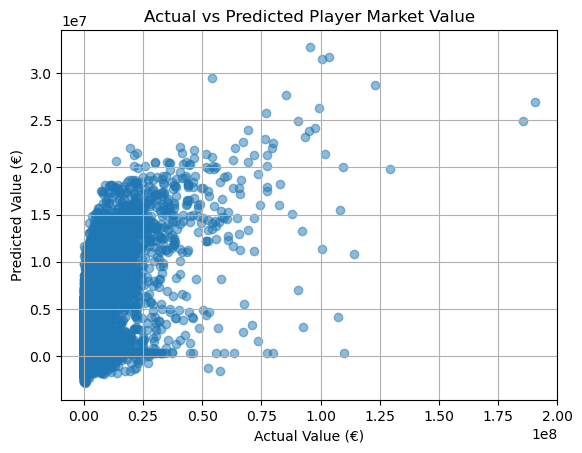

In [13]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title("Actual vs Predicted Player Market Value")
plt.grid(True)
plt.show()